In [1]:
import argparse
import numpy as np
import os
import tabulate
import torch
import torch.nn.functional as F
import torch.nn

import data
import models
import curves
import utils

import pickle

In [21]:
distances = pickle.load(open('stats3/dist_stat.p', "rb"))

In [24]:
distances[0] = distances[0]*2
distances

[112.74202728271484,
 63.446262,
 31.72313,
 15.861566,
 7.930783,
 3.9653914,
 1.9826957,
 0.9913478,
 0.4956739,
 0.24783695]

In [30]:
63.446262*2

126.892524

In [29]:
len(distances)

10

In [2]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

from scipy.stats import norm

VGG16

Computing mean distance.

Initialization for the layer in NN: 

$W_i \sim U(-\sqrt{k}, \sqrt{k})$
where $k = \frac 1 {N_{in}}$

$N_{in}$ - nubmer of input parameters for the weights. 

$N_{w}$ - numver of weights in the layer.

mean square dist between two layers in Linear layer:

$E [dist^2(L^1, L^2)] = E\sum_i (L_1^i-L_i^2)^2 = N_{w} (2 E (L_i^1)^2) = 2 N_{w} \frac{ \left (2 \sqrt k \right )^2} {12}  = \frac {2 N_{w}} {3 N_{in}}$

for convolution layer:

$E [dist^2(L^1, L^2)] = E\sum_i (L_1^i-L_i^2)^2 = N_{w} (2 E (L_i^1)^2) = 2 N_{w} \left (\sqrt \frac 2 {n} \right )$

where n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels

In [3]:
architecture = getattr(models, "VGG16")

model = architecture.base(num_classes=10, **architecture.kwargs)

In [4]:
# for m in self.modules():
#     if isinstance(m, nn.Conv2d):
#         n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
#         m.weight.data.normal_(0, math.sqrt(2. / n))
#         m.bias.data.zero_()

In [5]:
# distance for VGG16 network:
DIST = 0
i=1
for m in model.modules():
    if isinstance(m, torch.nn.Conv2d):
        print(i, m)
        i+=1
        N_in = m.in_channels*np.prod(m.kernel_size)
        n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
        N_w = np.prod(m.weight.shape)
#         +np.prod(m.bias.shape)
        print('N_in', N_in)
        print('N_w', N_w)
        DIST+=2*N_w*2/n
    if isinstance(m, torch.nn.Linear):
        print(i, m)
        i+=1
        N_in = m.in_features
        N_w = np.prod(m.weight.shape)+np.prod(m.bias.shape)
        print('N_in', N_in)
        print('N_w', N_w)
        DIST+=2/3*float(N_w)/float(N_in)
        

print()        
print('Distance', (np.sqrt(DIST)))

1 Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
N_in 27
N_w 1728
2 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
N_in 576
N_w 36864
3 Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
N_in 576
N_w 73728
4 Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
N_in 1152
N_w 147456
5 Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
N_in 1152
N_w 294912
6 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
N_in 2304
N_w 589824
7 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
N_in 2304
N_w 589824
8 Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
N_in 2304
N_w 1179648
9 Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
N_in 4608
N_w 2359296
10 Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
N_in 4608
N_w 2359296
11 Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
N_in 4608
N_w 2359296
12 Conv

In [7]:
def plot_stat(n, bins=5, name = None):
    if name is None:
        name = "middle_point_stat_"+str(n)+".p"
    statistic = pickle.load(open('stats2/'+name, "rb"))
    statistic = [s[1:] for s in statistic]
    statistic = np.array(statistic)

#     print(len(statistic))

    # Fit a normal distribution to the data:
    x = statistic[:, 0]
#     x = 100 - statistic[:, -1]
    mu, std = norm.fit(x)

    # Plot the histogram.
    plt.hist(x, bins=bins, alpha=0.6,density=True, color='g')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Test Error Rate, n = %.i, mu = %.2f,  std = %.2f, N = %.f" % (n, mu, std, len(statistic))
    plt.title(title)

    plt.show()

In [19]:
print('distanse %5.2f' % 60)

distanse 60.00


## Distance

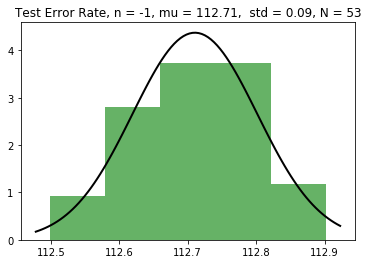

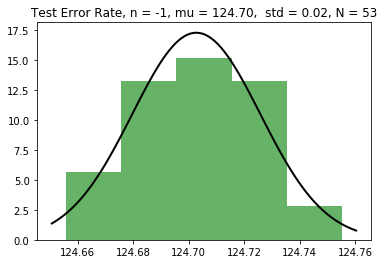

In [20]:
plot_stat(-1, bins=5, name='100middle_point_stat.p')
plot_stat(-1, bins=5, name='2middle_point_stat.p')

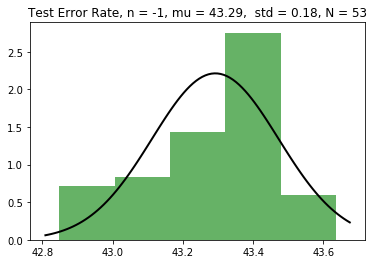

In [13]:
plot_stat(-1, bins=5, name='dist_init_train.p')

## Error 

In [12]:
# plot_stat(-1, bins=5, name='100middle_point_stat.p')
# plot_stat(-1, bins=5, name='2middle_point_stat.p')

##  Test Error for point from 1 to 15 

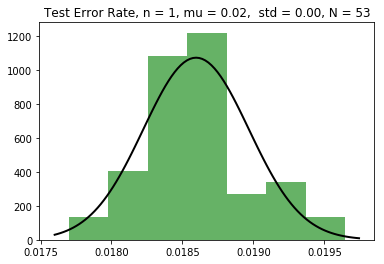

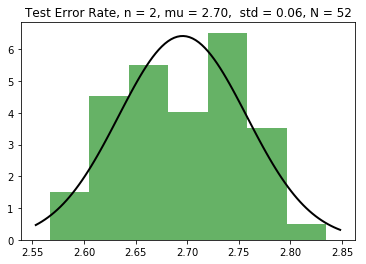

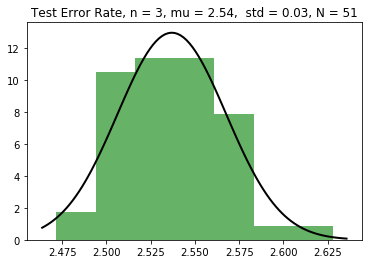

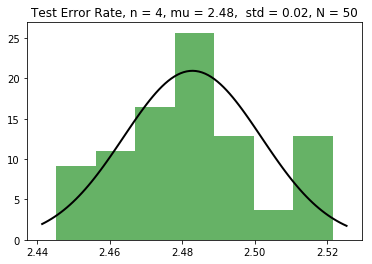

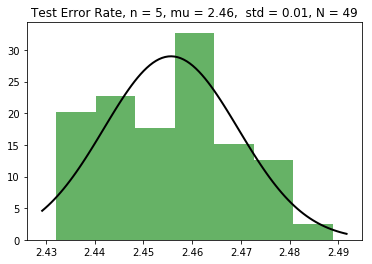

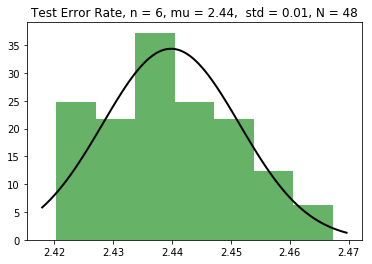

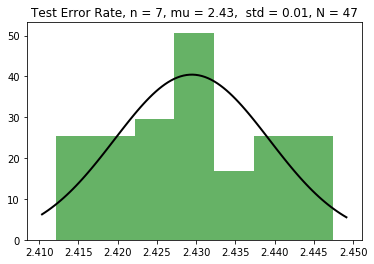

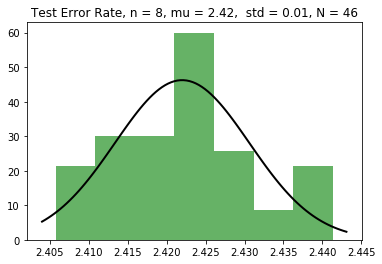

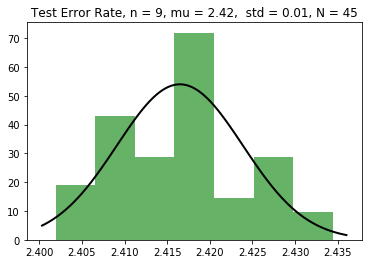

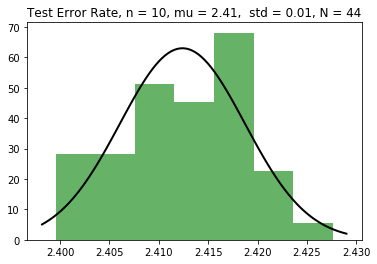

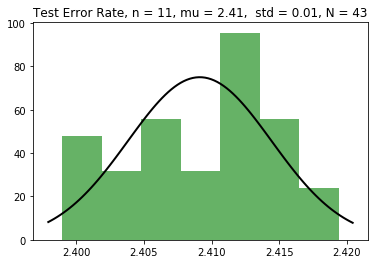

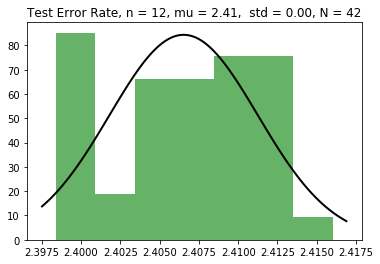

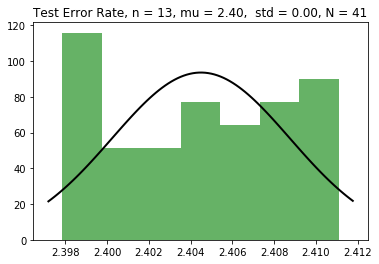

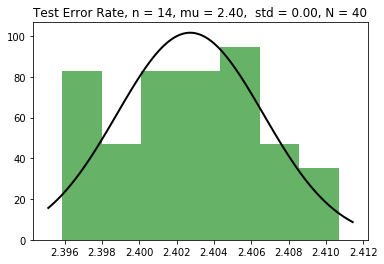

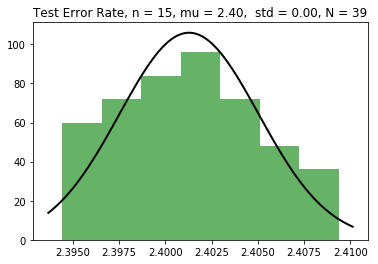

In [18]:
for i in range(1, 16):
    plot_stat(i, bins=7)